# Laboratorio di simulazione numerica

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string

### Exercise 10.1

##### Cities on a circle
The program solves the "travelling salesman problem" using a simulated annealing algorithm. It keeps on decreasing the "temperature" until the acceptance rate for the proposed steps drops below a given threshold, then it returns a solution.
The results can be obtained by running `./exercise10-1 circle` while in the `exercise10-1` directory, making sure to create beforehand the directory `circle`, that will hold the output files.

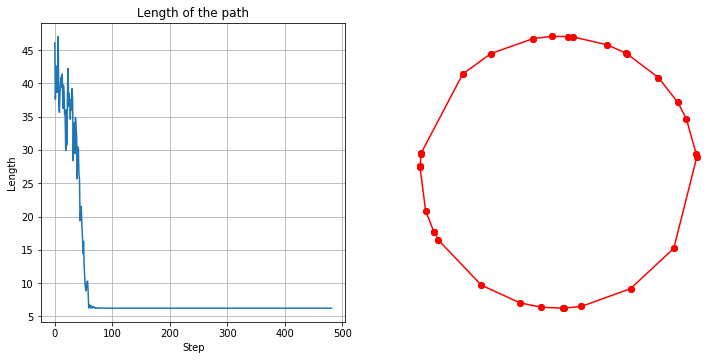

In [2]:
prefix = "exercise10-1/circle/"

progressive_length = np.loadtxt(prefix + "evolution.dat", unpack = True, usecols = (0,))
best_conf = np.loadtxt(prefix + "best_path.dat")
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5.5))
axes.flatten()

axes[0].plot(progressive_length)
axes[0].set_title("Length of the path")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Length")
axes[0].grid(True)

cities = np.loadtxt(prefix + "cities.dat")
best_path = [cities[int(i)] for i in best_conf]
for i in range(len(best_path)):
    x1, y1 = best_path[i]
    x2, y2 = best_path[i - 1]
    axes[1].plot([x1, x2], [y1, y2], "ro-")

axes[1].axis("off")
plt.show()

##### Cities in a square
The same as above, but this time the cities are placed randomly inside a square. The results can be obtained by running `./exercise10-1 square` while in the `exercise10-1` directory, making sure to create beforehand the directory `square`, that will hold the output files.

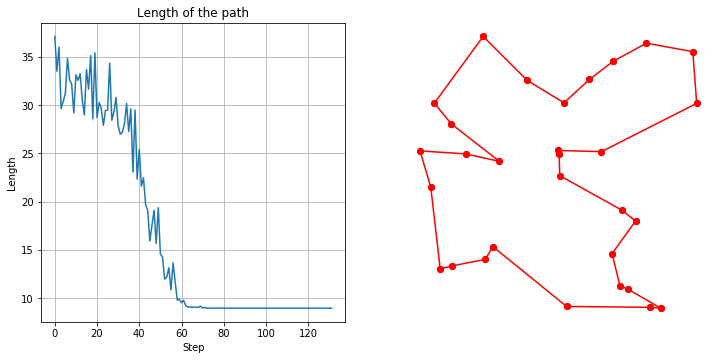

In [3]:
prefix = "exercise10-1/square/"

progressive_length = np.loadtxt(prefix + "evolution.dat", unpack = True, usecols = (0,))
best_conf = np.loadtxt(prefix + "best_path.dat")
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5.5))
axes.flatten()

axes[0].plot(progressive_length)
axes[0].set_title("Length of the path")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Length")
axes[0].grid(True)

cities = np.loadtxt(prefix + "cities.dat")
best_path = [cities[int(i)] for i in best_conf]
for i in range(len(best_path)):
    x1, y1 = best_path[i]
    x2, y2 = best_path[i - 1]
    axes[1].plot([x1, x2], [y1, y2], "ro-")

axes[1].axis("off")
plt.show()

### Exercise 10.2
In this exercise I try to solve the problem of exercise 10.1, this time paralellising the code using the MPI features. The core of the program is roughly the same as `./exercise10-1`, but the parallelisation makes running several simulations at once possible.

##### Cities on a circle
The plots below were generated with three processes running simultaneously, i.e. by running `mpirun -np 3 ./exercise10-2 circle` while in the `exercise10-2` directory. It shows, at each step, the best result among the three processes.
Make sure that the subdirectory `circle` exists before launching the problem: the output data will be stored in there.

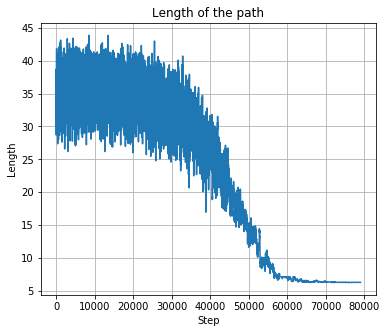

In [6]:
prefix = "exercise10-2/circle/"
progressive_length = np.loadtxt(prefix + "evolution_0.dat", unpack = True, usecols = (0,))
# "0" is the rank of the main process, that collects and reduces the
# data from the secondary processes after they terminate.
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))

axes.plot(progressive_length)
axes.set_title("Length of the path")
axes.set_xlabel("Step")
axes.set_ylabel("Length")
axes.grid(True)

plt.show()

##### Cities in a square
The plots below was generated with three processes running simultaneously, i.e. by running `mpirun -np 3 ./exercise10-2 square` while in the `exercise10-2` directory. It shows, at each step, the best result among the three processes.
Make sure that the subdirectory `square` exists before launching the problem: the output data will be stored in there.

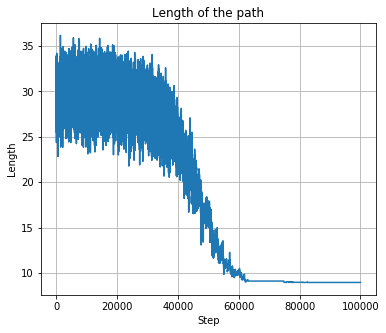

In [7]:
prefix = "exercise10-2/square/"
progressive_length = np.loadtxt(prefix + "evolution_0.dat", unpack = True, usecols = (0,))
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))

axes.plot(progressive_length)
axes.set_title("Length of the path")
axes.set_xlabel("Step")
axes.set_ylabel("Length")
axes.grid(True)

plt.show()